In [1]:
import pandas as pd 
import numpy as np 
from DataLoader import train_df,test_df


train = train_df(build_meta_csv = './data/building_metadata.csv',
                train_csv = './data/train.csv',
                weather_train_csv = './data/weather_train.csv',
                merge = True,
                datetime = True,
                unmerged = False,
                drop = False)

train.head(10)

Memory usage of properties dataframe is : 616.9464874267578  MB
******************************
Column:  building_id
dtype before:  int64
min for this col:  0
max for this col:  1448
dtype after:  uint16
******************************
******************************
Column:  meter
dtype before:  int64
min for this col:  0
max for this col:  3
dtype after:  uint8
******************************
******************************
Column:  meter_reading
dtype before:  float64
min for this col:  0.0
max for this col:  21904700.0
dtype after:  float32
******************************
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  289.1937065124512  MB
This is  46.875006569639226 % of the initial size


,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,year,month,day,weekday,hour
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
5,5,0,2016-01-01,0.0,0,Education,8000,2000.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
6,6,0,2016-01-01,0.0,0,Lodging/residential,27926,1981.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
7,7,0,2016-01-01,0.0,0,Education,121074,1989.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
8,8,0,2016-01-01,0.0,0,Education,60809,2003.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0
9,9,0,2016-01-01,0.0,0,Office,27000,2010.0,NaN,25.0,...,20.0,NaN,1019.7,0.0,0.0,2016,1,1,4,0


[Text(0, 0, 'Education'),
 Text(0, 0, 'Lodging/residential'),
 Text(0, 0, 'Office'),
 Text(0, 0, 'Entertainment/public assembly'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Retail'),
 Text(0, 0, 'Parking'),
 Text(0, 0, 'Public services'),
 Text(0, 0, 'Warehouse/storage'),
 Text(0, 0, 'Food sales and service'),
 Text(0, 0, 'Religious worship'),
 Text(0, 0, 'Healthcare'),
 Text(0, 0, 'Utility'),
 Text(0, 0, 'Technology/science'),
 Text(0, 0, 'Manufacturing/industrial'),
 Text(0, 0, 'Services')]

<Figure size 720x720 with 0 Axes>

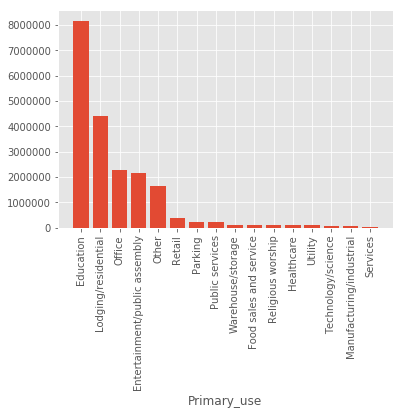

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(10,10)) 

fig,ax = plt.subplots() 
ax.bar(train['primary_use'].unique(),train['primary_use'].value_counts()) 
ax.set_xlabel("Primary_use")
ax.set_xticklabels(train['primary_use'].unique(),rotation=90)

In [46]:
# Number of Nan Values
ratio = train.count()/len(train) 
print(ratio)

building_id           1.000000
meter                 1.000000
timestamp             1.000000
meter_reading         1.000000
site_id               1.000000
primary_use           1.000000
square_feet           1.000000
year_built            0.400100
floor_count           0.173472
air_temperature       0.995219
cloud_coverage        0.563449
dew_temperature       0.995047
precip_depth_1_hr     0.814553
sea_level_pressure    0.939075
wind_direction        0.928322
wind_speed            0.992893
year                  1.000000
month                 1.000000
day                   1.000000
weekday               1.000000
hour                  1.000000
dtype: float64


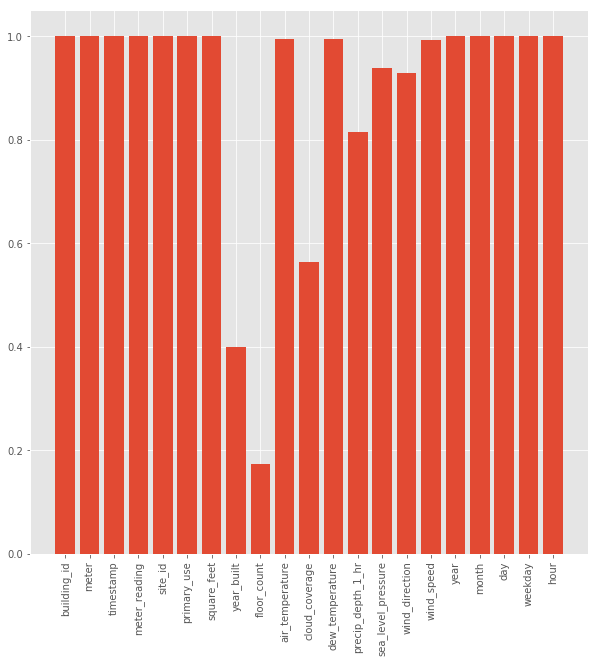

In [131]:
plt.figure(figsize=(10,10))
plt.bar(train.columns,ratio)
plt.xticks(train.columns,rotation=90)
plt.show()

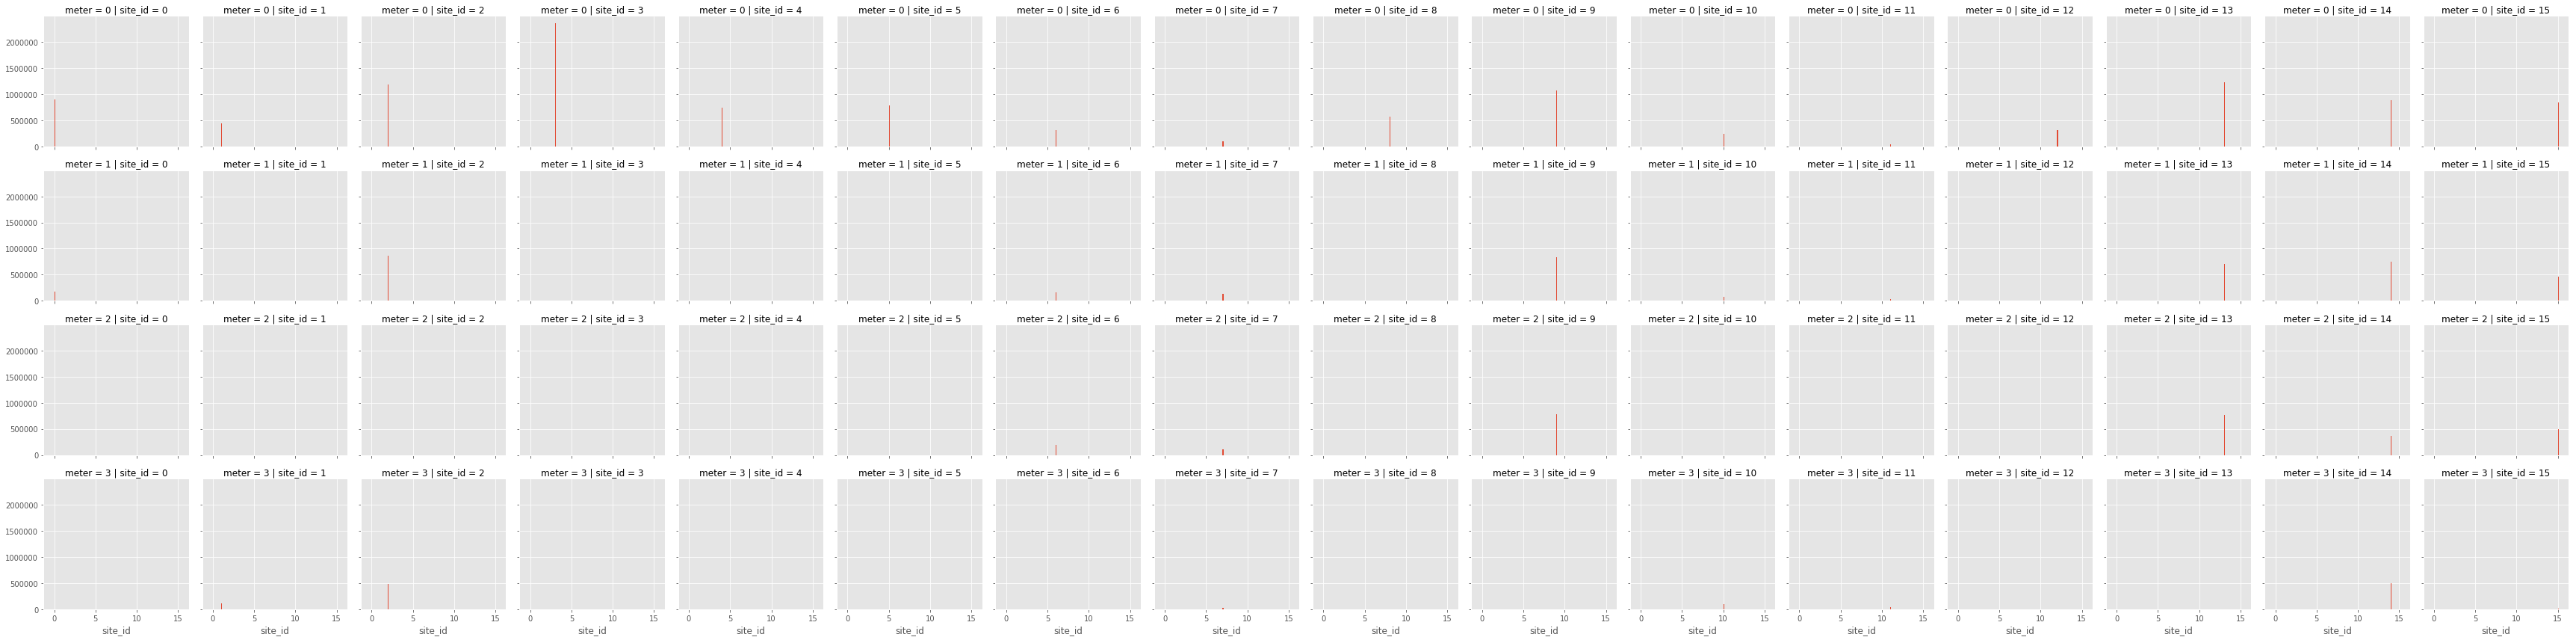

In [53]:
g = sns.FacetGrid(train,col='site_id',row='meter')
g = g.map(plt.hist,'site_id')

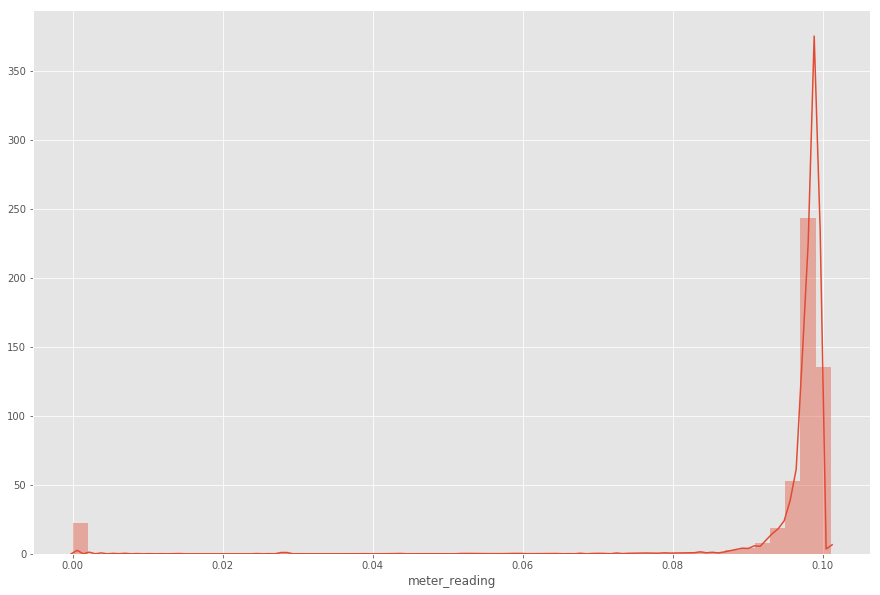

In [179]:
train['meter_reading'] = np.log1p(train['meter_reading'])
plt.figure(figsize=(15,10))
dist_1 = sns.distplot(train.loc[train['meter'] == 0,'meter_reading'])

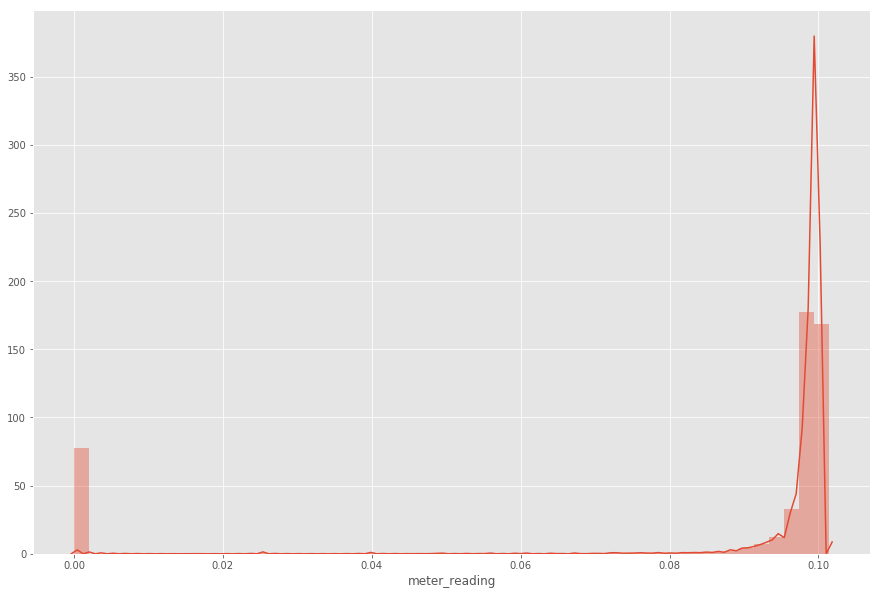

In [180]:
plt.figure(figsize=(15,10))
dist_2 = sns.distplot(train.loc[train['meter'] == 1,'meter_reading'])

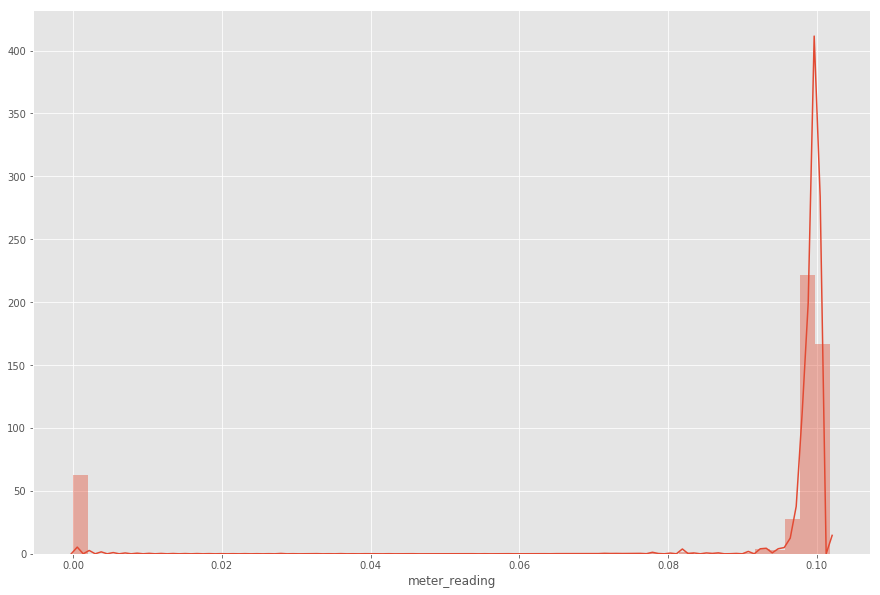

In [181]:
plt.figure(figsize=(15,10))
dist_3 = sns.distplot(train.loc[train['meter'] == 2,'meter_reading'])

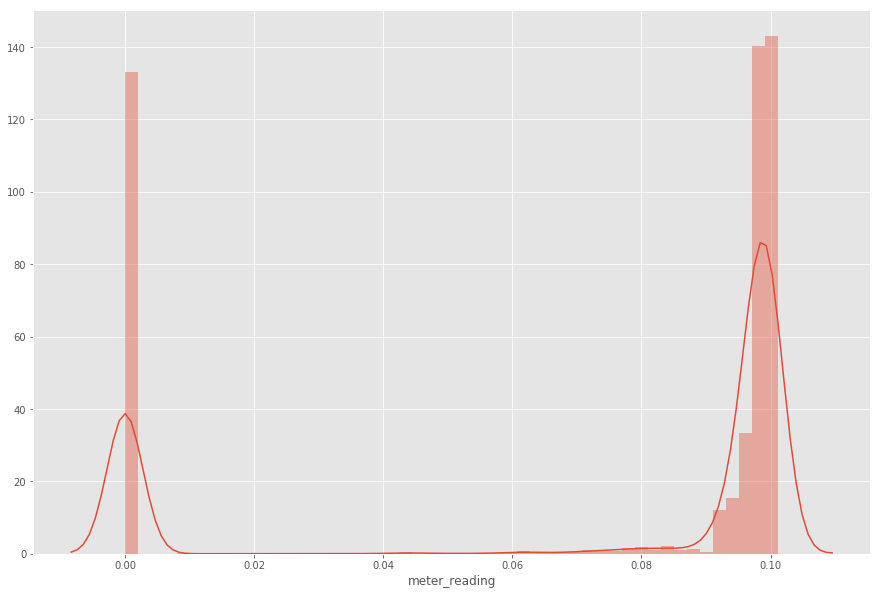

In [182]:
plt.figure(figsize=(15,10))
dist_4 = sns.distplot(train.loc[train['meter'] == 3,'meter_reading'])

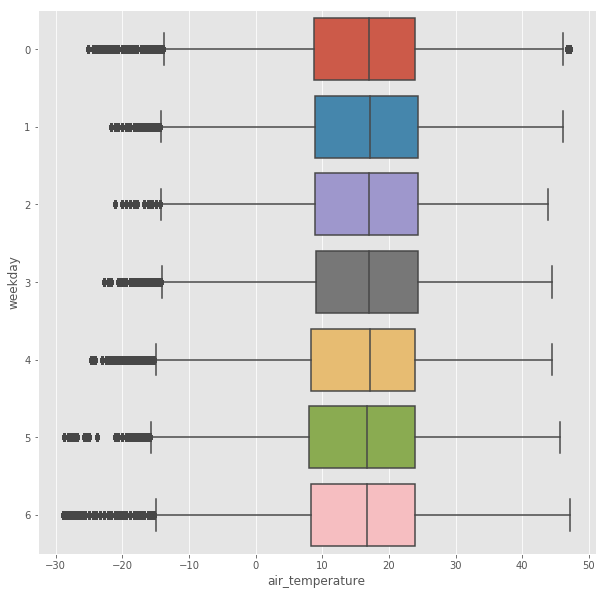

In [138]:
plt.figure(figsize=(10,10))
box = sns.boxplot(x='air_temperature',y='weekday',data=train,orient='h')

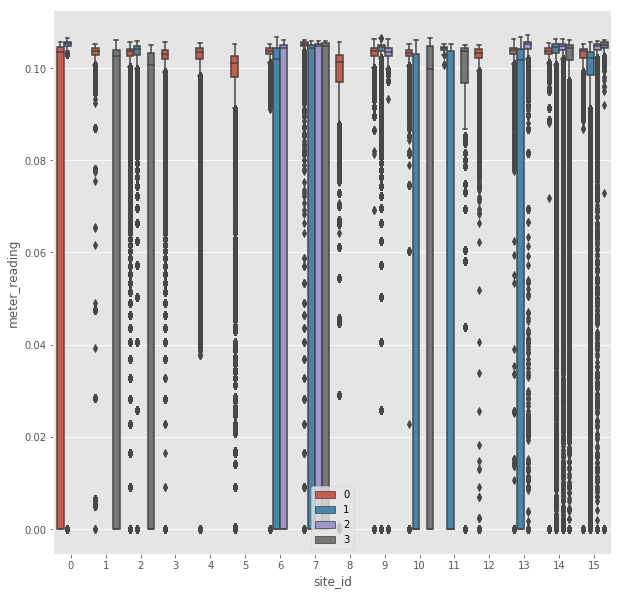

In [149]:
plt.figure(figsize=(10,10)) 
box = sns.boxplot(x='site_id',y='meter_reading',data=train,hue='meter')
plt.legend(loc='lower center')

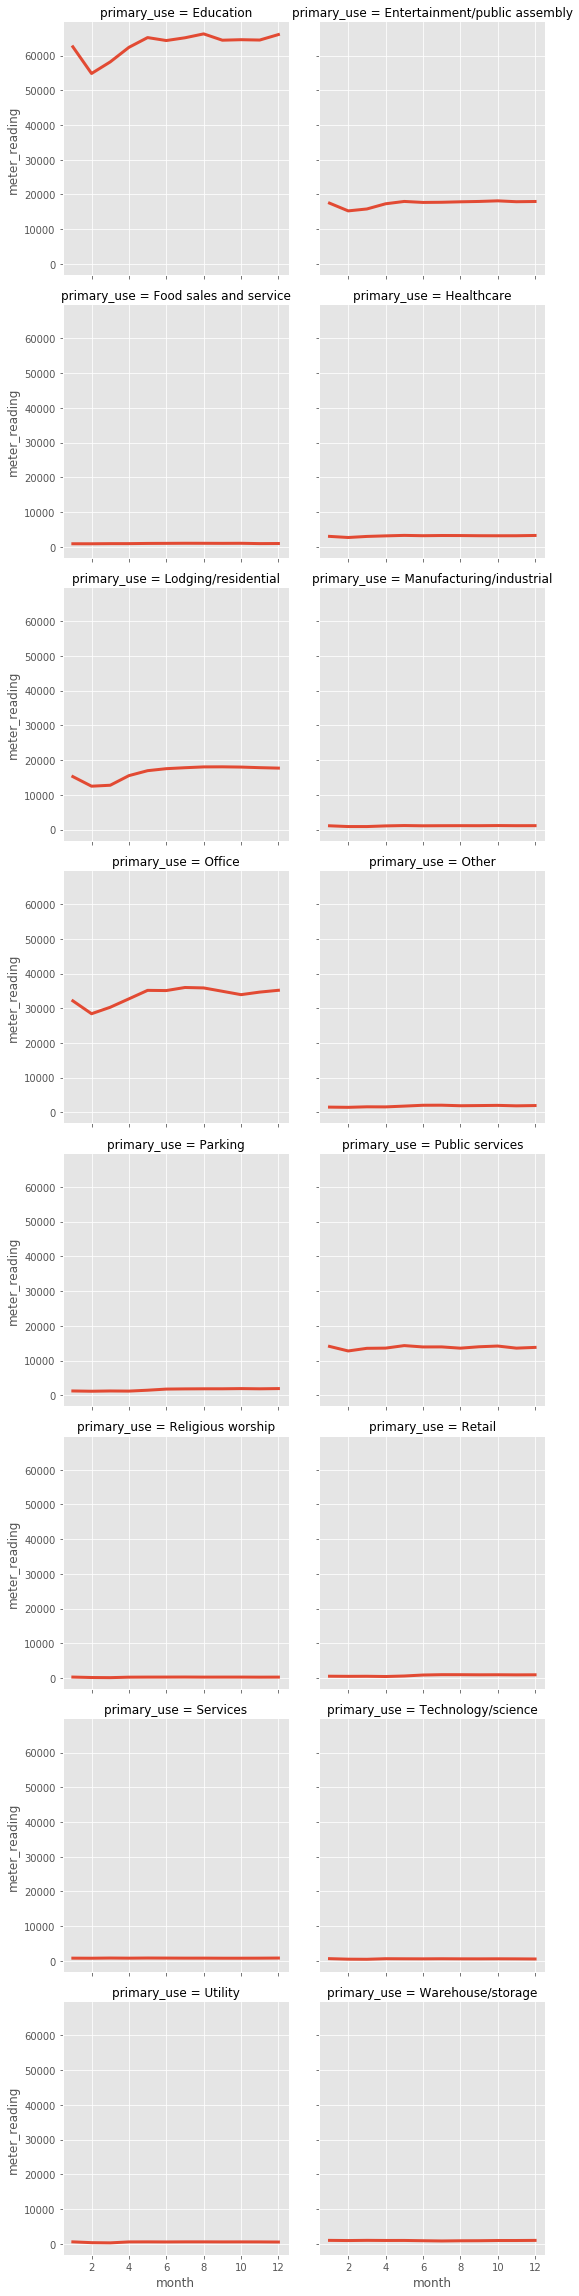

In [176]:
temp_df = train.groupby(['month','primary_use']).meter_reading.sum().reset_index()
ax = sns.FacetGrid(temp_df,col='primary_use',col_wrap=2,height=4)
ax.map(plt.plot,'month','meter_reading',linewidth=3)

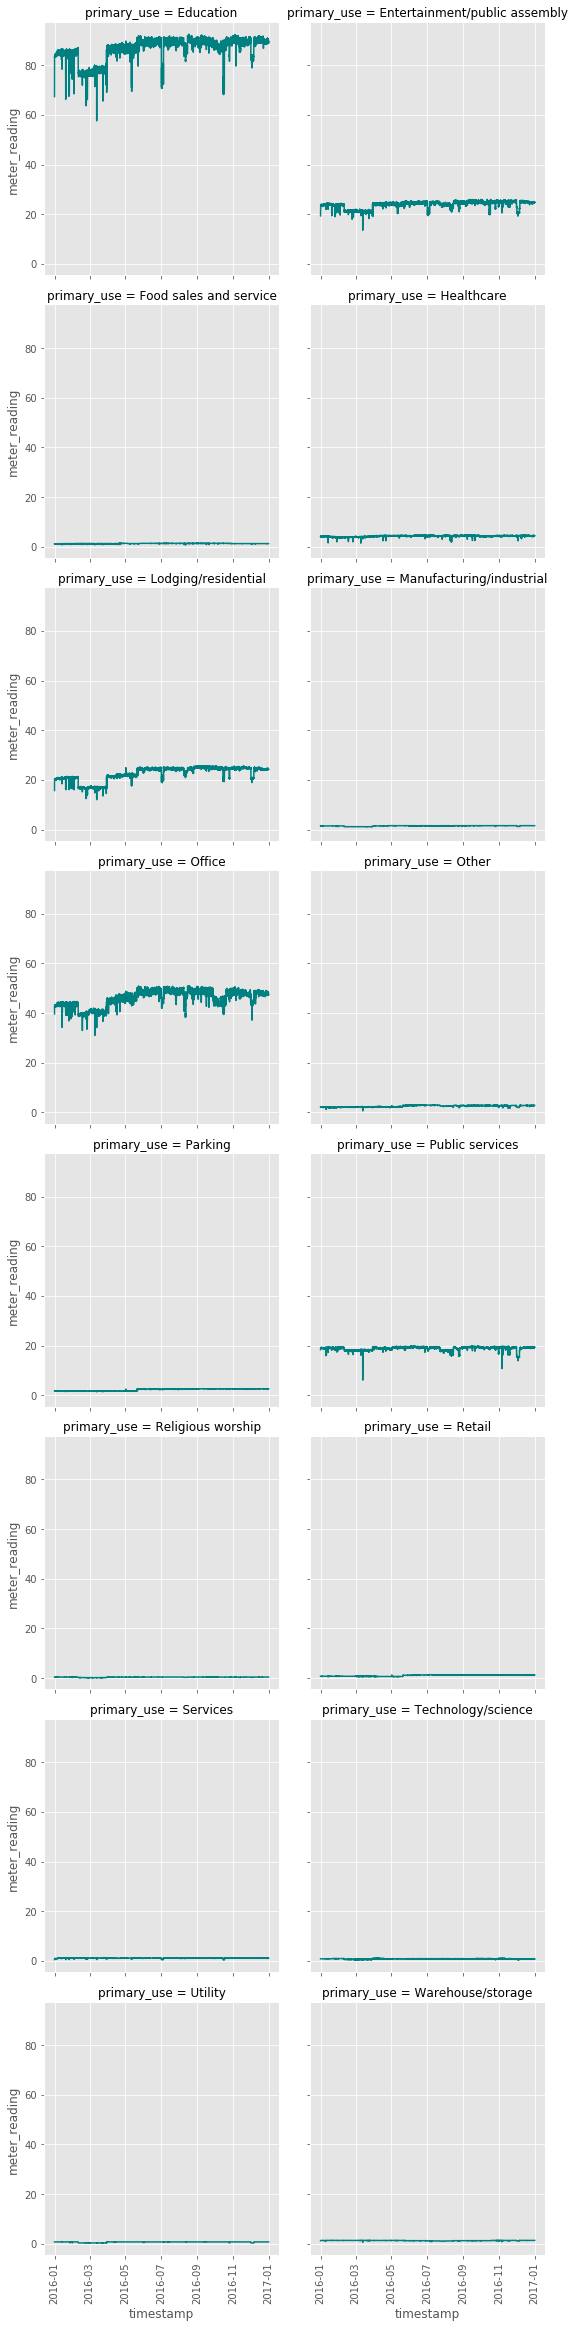

In [178]:
temp_df = train.groupby(['timestamp','primary_use']).meter_reading.sum().reset_index()
ax = sns.FacetGrid(temp_df,col='primary_use',col_wrap=2,height=4)
ax.map(sns.lineplot,'timestamp','meter_reading',color='teal')
ax.set_xticklabels(rotation=90)